In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA

# A) Reading Test And Label Files

In [2]:
test = pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv')
smap_test = pd.read_csv('smap_test.csv')
smap_test_label = pd.read_csv('smap_test_label.csv')
msl_test = pd.read_csv('msl_test.csv')
msl_test_label = pd.read_csv('msl_test_label.csv')
psm_test = pd.read_csv('psm_test.csv')
psm_test_label = pd.read_csv('psm_test_label.csv')

In [3]:
# Setting timestamp_min as index in psm datset
psm_test.set_index('timestamp_(min)', inplace = True)
psm_test_label.set_index('timestamp_(min)', inplace = True)
# Run only once

# B) Drawing Time Series With Anomaly Regions

## Time Series Plot For Test Dataset (test.csv -> test_label.csv)

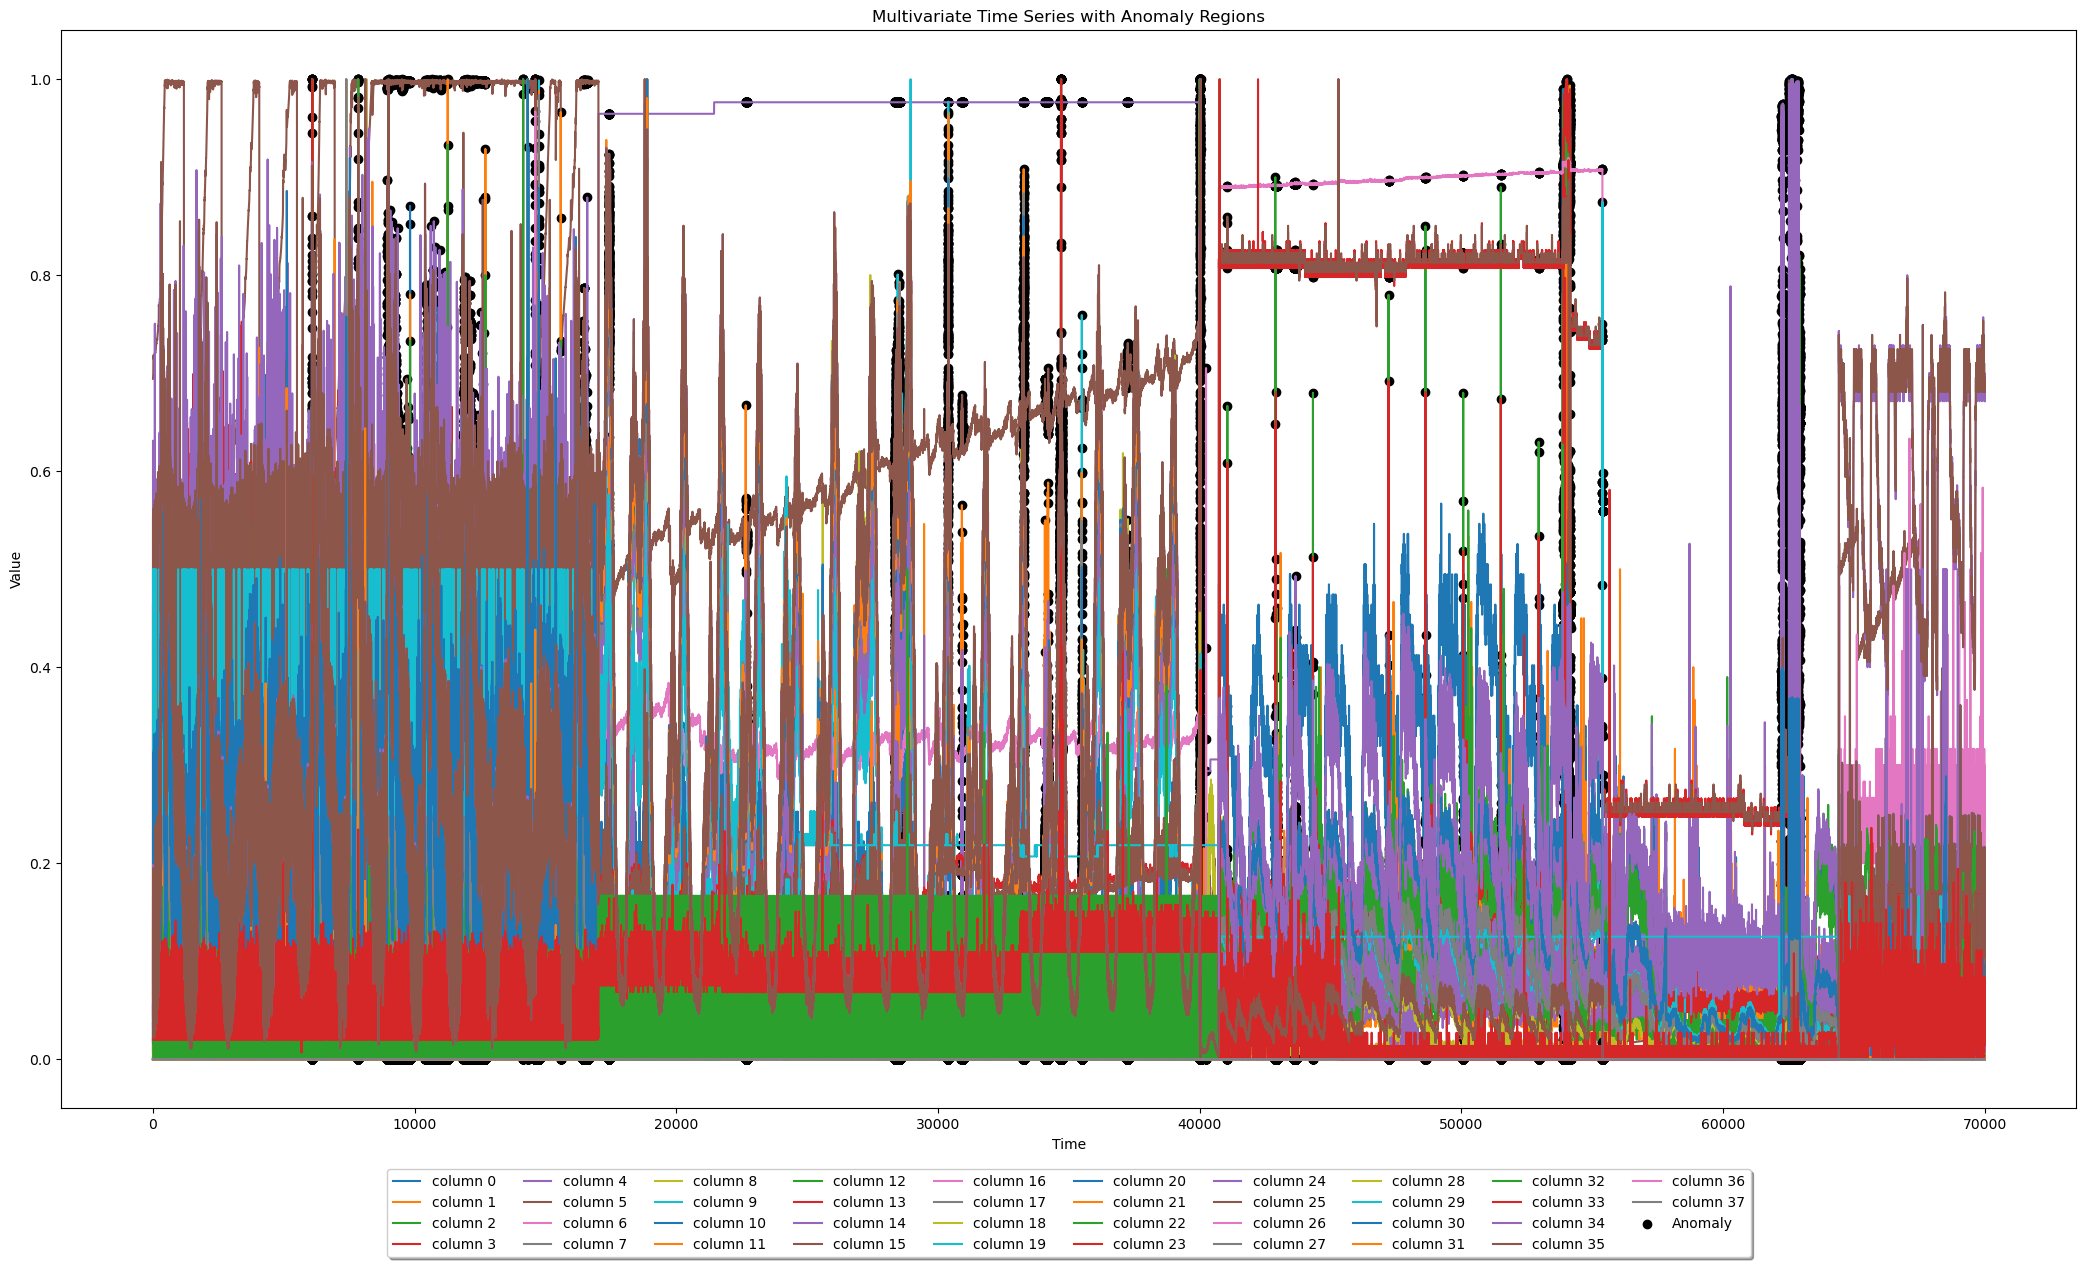

In [4]:
plt.figure(figsize=(26, 14))

# plotting each time series
for i in range(test.shape[1]):
    plt.plot(test[str(i)], label='column ' + str(i))

# to highlight the anomaly
anomalies = test_label[test_label['0'] == 1].index
for i in range(test.shape[1]):
    plt.scatter(anomalies, test.loc[anomalies, str(i)], color='black', label='Anomaly' if i == 0 else "")

plt.title('Multivariate Time Series with Anomaly Regions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=10)
plt.show()

## Time Series Plot For Smap Dataset (smap_test.csv -> smap_test_label.csv)

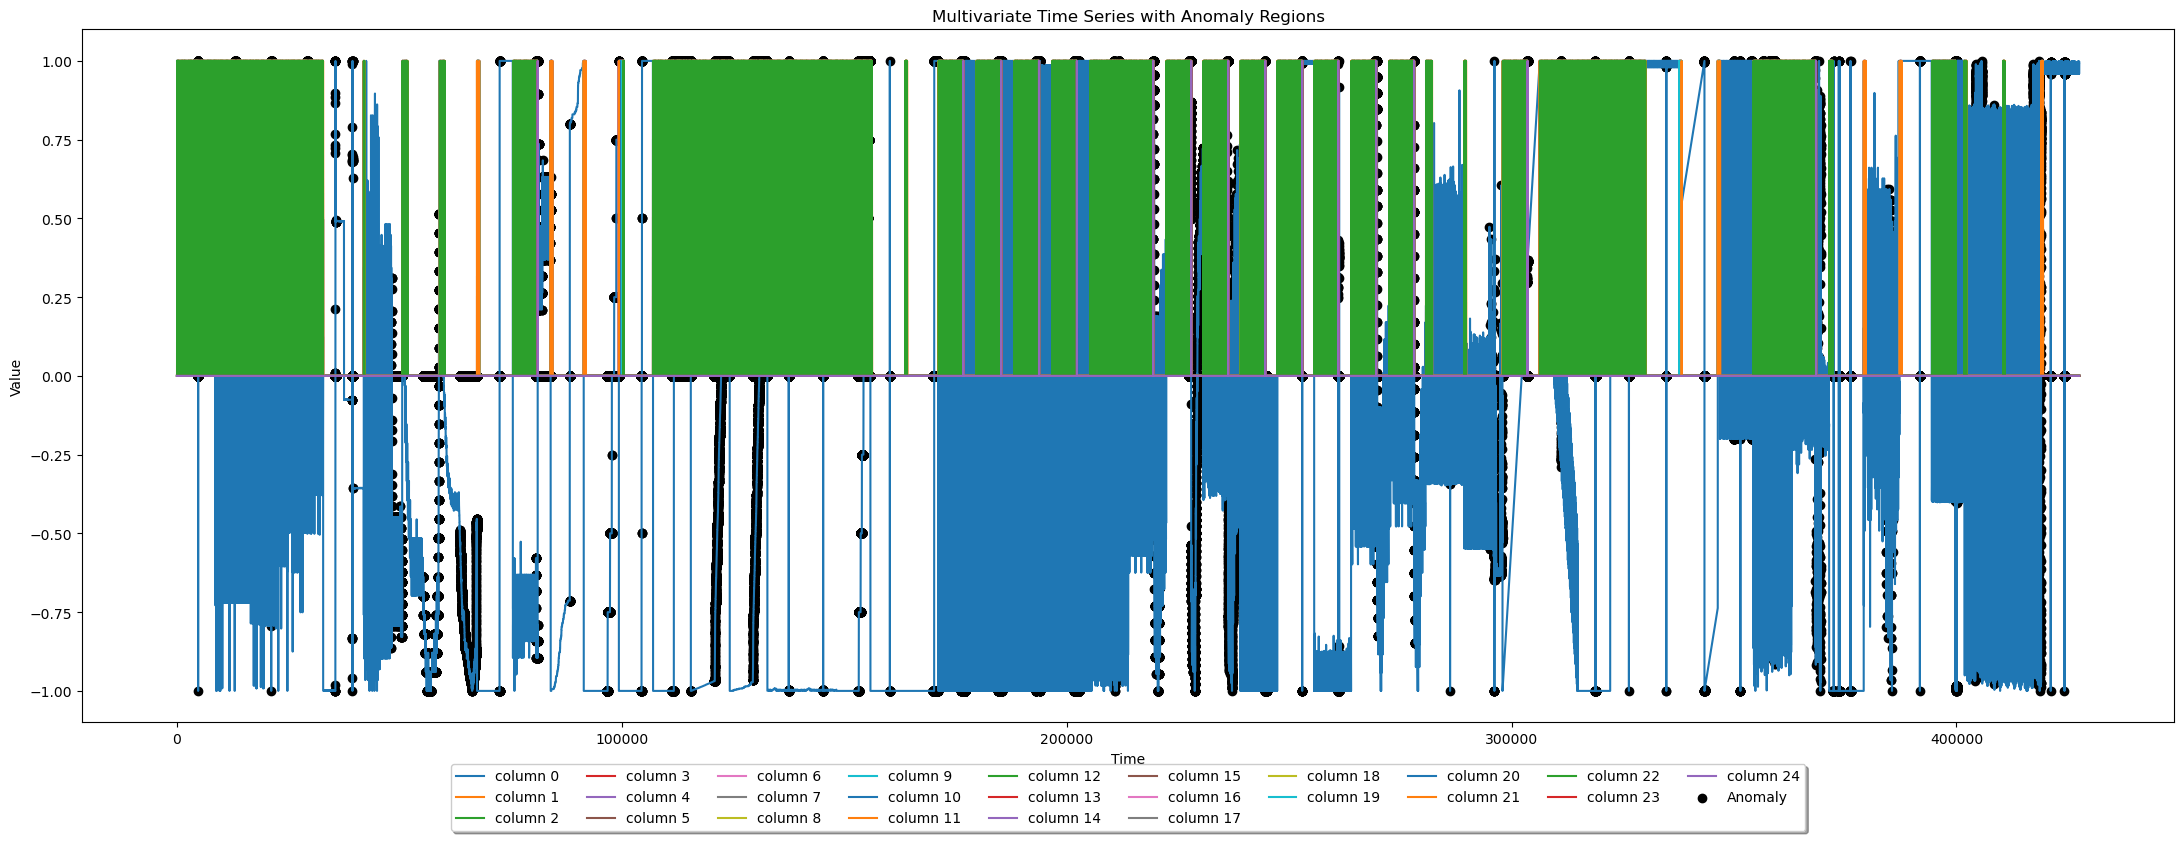

In [5]:
plt.figure(figsize=(27, 9))

for i in range(smap_test.shape[1]):
    plt.plot(smap_test[str(i)], label='column ' + str(i))

anomalies = smap_test_label[smap_test_label['0'] == 1].index
for i in range(smap_test.shape[1]):
    plt.scatter(anomalies, smap_test.loc[anomalies, str(i)], color='black', label='Anomaly' if i == 0 else "")

plt.title('Multivariate Time Series with Anomaly Regions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=10)
plt.show()

## Time Series Plot For Msl Dataset (msl_test.csv -> msl_test_label.csv)

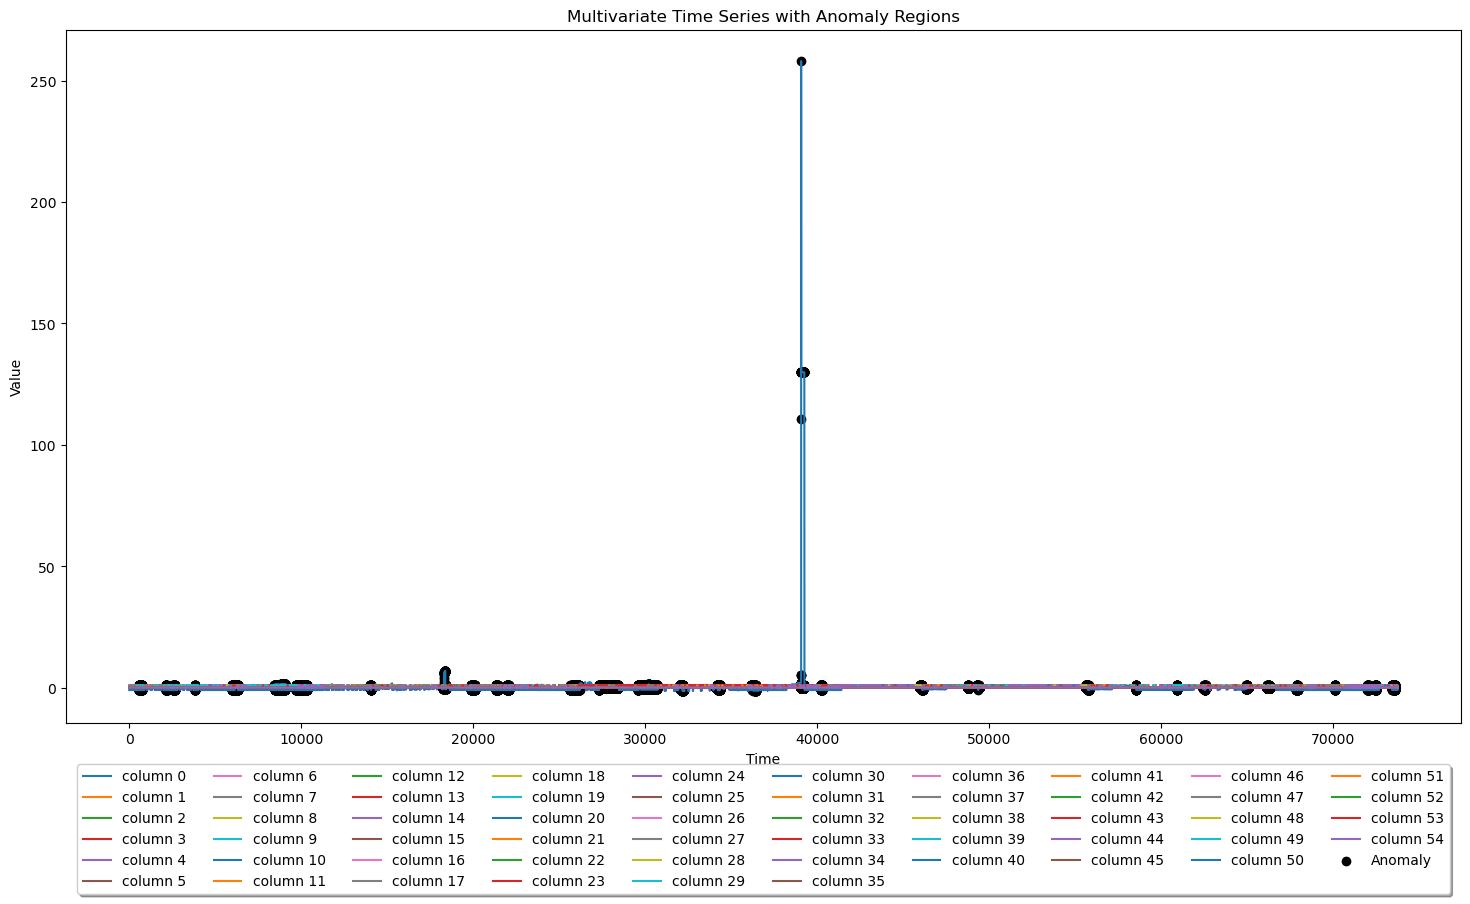

In [6]:
plt.figure(figsize=(18, 9))

for i in range(msl_test.shape[1]):
    plt.plot(msl_test[str(i)], label='column ' + str(i))

anomalies = msl_test_label[msl_test_label['0'] == 1].index
for i in range(msl_test.shape[1]):
    plt.scatter(anomalies, msl_test.loc[anomalies, str(i)], color='black', label='Anomaly'  if i == 0 else "")

plt.title('Multivariate Time Series with Anomaly Regions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=10)
plt.show()

## Time Series Plot For Psm Dataset (psm_test.csv -> psm_test_label.csv)

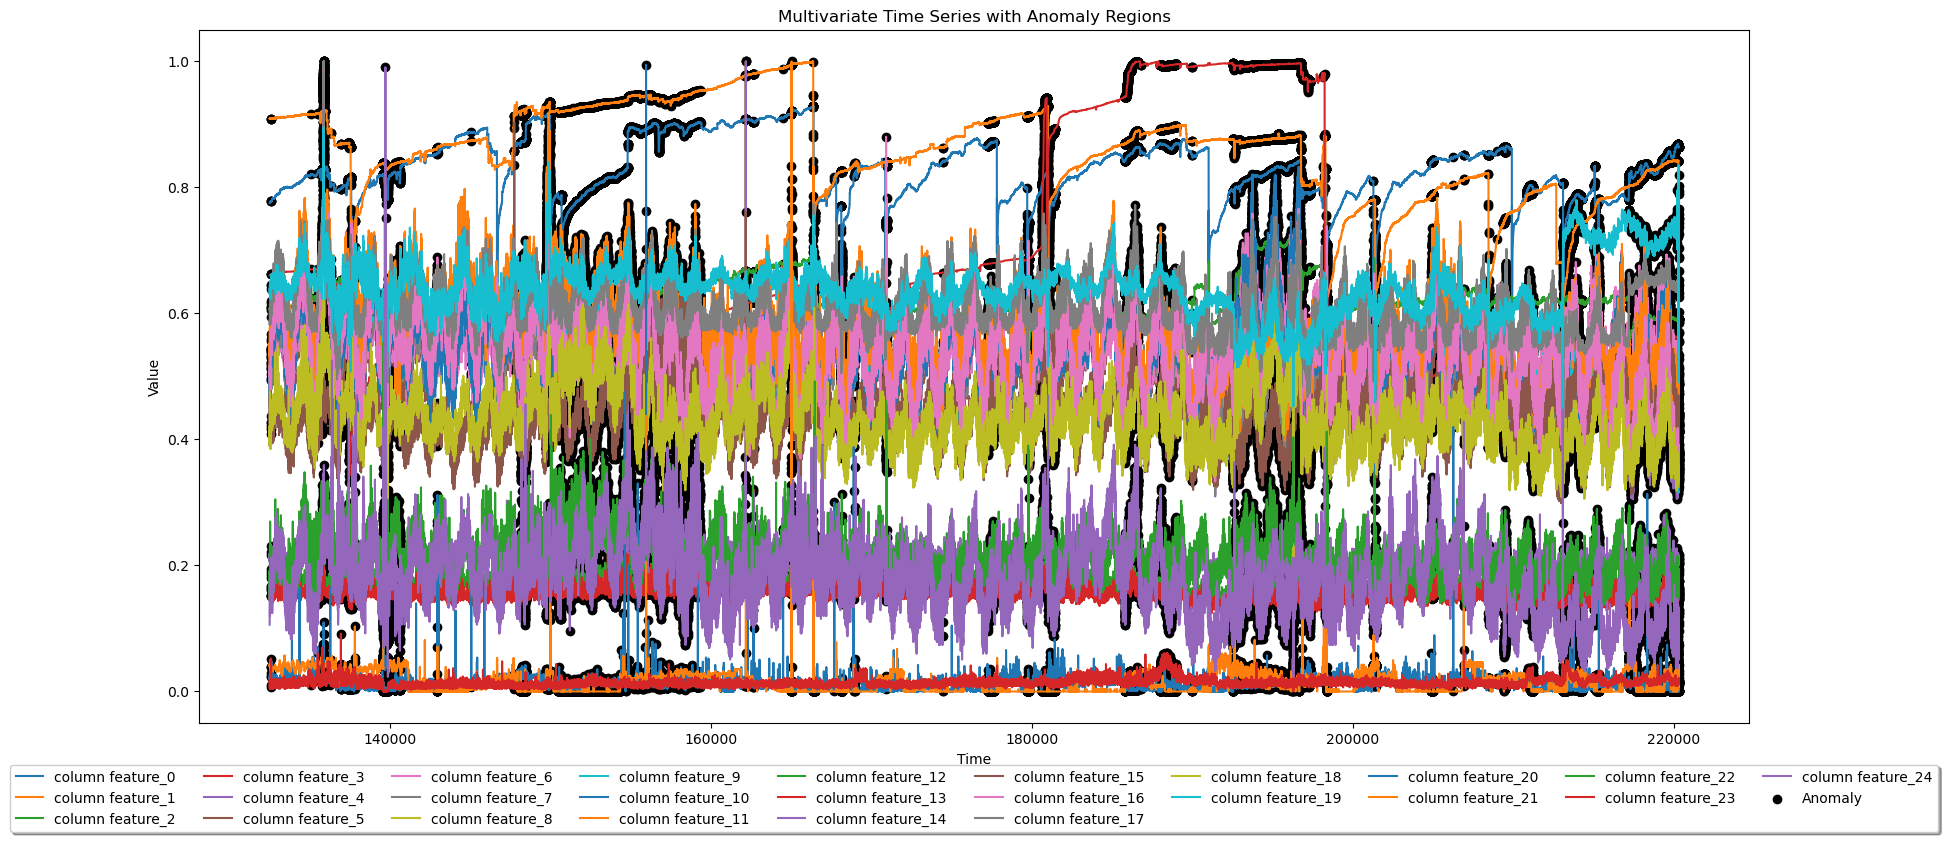

In [7]:
plt.figure(figsize=(20, 9))

for i in psm_test.columns:
    plt.plot(psm_test.index, psm_test[i], label='column ' + str(i))

anomalies = psm_test_label[psm_test_label['label'] == 1].index
for i in psm_test.columns:
    plt.scatter(anomalies, psm_test.loc[anomalies, i], color='black', label='Anomaly' if i == psm_test.columns[0] else "")

plt.title('Multivariate Time Series with Anomaly Regions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=10)
plt.show()

# C) Performing EDA 

## EDA On Test Dataset (test.csv -> test_label.csv)

In [8]:
test.describe()


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.000000,70001.000000,...,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.0
mean,0.125281,0.025424,0.034415,0.037462,0.322057,0.459721,0.336344,0.0,0.011226,0.000749,...,0.000008,0.169050,0.191246,0.104893,0.018708,0.051599,0.269691,0.229657,0.0,0.0
std,0.148530,0.072388,0.088629,0.093520,0.456736,0.347015,0.312518,0.0,0.056158,0.015199,...,0.001740,0.075581,0.170423,0.187695,0.054665,0.047420,0.213860,0.230937,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.010309,0.001495,0.001873,0.002546,0.000000,0.068121,0.060259,0.0,0.000058,0.000000,...,0.000000,0.125000,0.061520,0.000000,0.000000,0.013514,0.099265,0.042573,0.0,0.0
50%,0.070707,0.004785,0.005242,0.006364,0.000000,0.534963,0.309052,0.0,0.001867,0.000000,...,0.000000,0.149425,0.137931,0.001101,0.000000,0.028623,0.224793,0.137634,0.0,0.0
75%,0.191919,0.020927,0.029270,0.031797,0.976471,0.685973,0.346061,0.0,0.006221,0.000000,...,0.000000,0.218391,0.254096,0.114316,0.000000,0.089041,0.396694,0.391304,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,0.976471,1.000000,1.000000,0.0,1.000000,1.000000,...,0.455867,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


<Axes: >

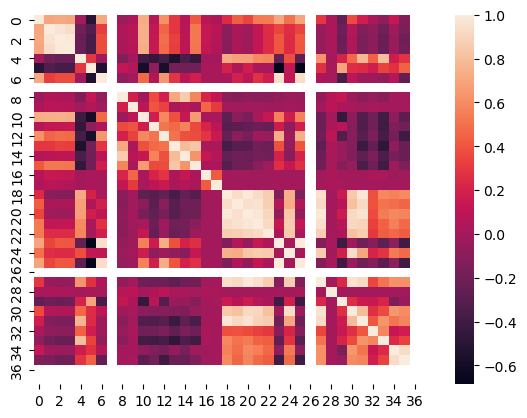

In [9]:
corr = test.corr()
sns.heatmap(corr)

In [10]:
anomalies1 = test[test_label['0'] == 1]
anomalies1.shape

(4600, 38)

In [11]:
percentage = (anomalies1.shape[0] / test.shape[0]) * 100
print(f"{percentage:.4f}% of the rows are anomaly in test dataset")

6.5713% of the rows are anomaly in test dataset


In [12]:
# Correlation of variables with anomaly
correlations1 = []
for i in range(test.shape[1]):
    if test[str(i)].std() != 0 and not test[str(i)].isnull().any():  # exlude variables that have 0 standard deviation or contain NaN values
        corr = test[str(i)].corr(test_label['0'])
        if not np.isnan(corr):  
            correlations1.append(corr)

correlations1 = np.array(correlations1)

print(correlations1)

[ 0.09278557  0.31834042  0.31698594  0.31473915 -0.10182441  0.20013165
 -0.12394169  0.08891766  0.10077488  0.13951261  0.19514562  0.042752
  0.12025974  0.06561694  0.23051732  0.05822362  0.02797354 -0.01810848
 -0.01918036  0.02425079  0.0231539   0.09199667 -0.11479824  0.18507327
 -0.11246621  0.06888464  0.01626535  0.17920029  0.13433747 -0.03541378
  0.00884795 -0.04689196  0.11330997  0.12441965]


In [13]:
# Some columns have higher correlation with anomaly and are the root cause of anomalies.

## EDA On Smap Dataset (smap_test.csv -> smap_test_label.csv)

In [14]:
smap_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,...,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000
mean,-0.179944,0.019174,0.003442,0.015392,0.000313,0.090146,0.068957,0.000664,0.000194,0.000309,...,0.000063,0.000063,0.014838,0.014504,0.007736,0.000103,0.020607,0.019125,0.000065,0.000065
std,0.775223,0.137135,0.058570,0.123107,0.017699,0.286391,0.253381,0.025762,0.013931,0.017567,...,0.007946,0.007946,0.120905,0.119555,0.087613,0.010143,0.142066,0.136963,0.008092,0.008092
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.997772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.358844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

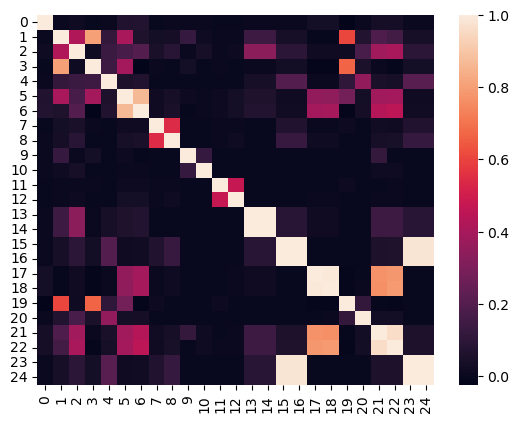

In [15]:
corr = smap_test.corr()
sns.heatmap(corr)

In [16]:
# very low correlation between variables of smap dataset

In [17]:
anomalies2 = smap_test[smap_test_label['0'] == 1]
anomalies2.shape

(54696, 25)

In [18]:
percentage = (anomalies2.shape[0] / test.shape[0]) * 100
print(f"{percentage:.4f}% of the rows are anomaly in smap dataset")

78.1360% of the rows are anomaly in smap dataset


In [19]:
# A very high anomaly rate found in smap dataset

In [20]:
# Correlation 
correlations2 = []
for i in range(smap_test.shape[1]):
    if smap_test[str(i)].std() != 0 and not smap_test[str(i)].isnull().any():
        corr = smap_test[str(i)].corr(smap_test_label['0'])
        if not np.isnan(corr):  
            correlations2.append(corr)

correlations2 = np.array(correlations2)

print(correlations2)


[ 0.04281737 -0.0179584  -0.00362008 -0.01745509 -0.0008465  -0.04370511
 -0.03887108 -0.00389363 -0.00030984 -0.00274385 -0.00082824 -0.00598814
 -0.00145426 -0.00135616 -0.00135616  0.02074908  0.02074908 -0.01729158
 -0.01746979 -0.01135815  0.00646949 -0.01725673 -0.01595215  0.02112985
  0.02112985]


In [21]:
# Clearly the first column has high correlation with anomaly as compared to other columns
# It might be the root cause of anomaly in this dataset

## EDA On Msl Dataset (msl_test.csv -> msl_test_label.csv)

In [22]:
msl_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,73729.000000,73729.0,73729.0,73729.0,73729.0,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,...,73729.000000,73729.000000,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,73729.0,73729.000000,73729.000000
mean,0.238579,0.0,0.0,0.0,0.0,0.077758,0.000543,0.000258,0.0,0.000095,...,0.000203,0.000014,0.010891,0.000136,0.008274,0.0,0.000041,0.0,0.001506,0.001723
std,6.626549,0.0,0.0,0.0,0.0,0.267792,0.023286,0.016051,0.0,0.009743,...,0.014262,0.003683,0.103792,0.011645,0.090583,0.0,0.006379,0.0,0.038772,0.041468
min,-1.424197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,-0.986429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,-0.310727,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.918899,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,258.108108,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [23]:
# A lot of useless columns having all values zero, a lot of sparsity in this dataset, a few columns might be inducing anomaly

<Axes: >

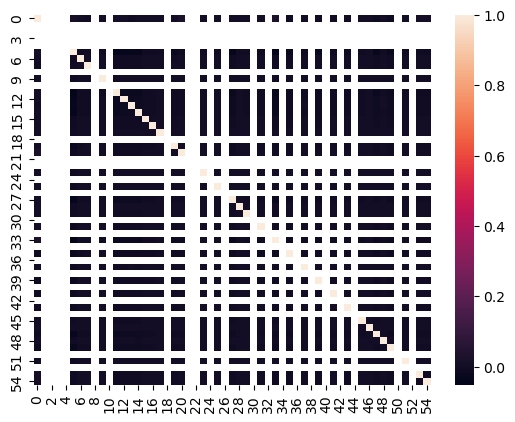

In [24]:
corr = msl_test.corr()
sns.heatmap(corr)

In [25]:
# No correlation between the variables as too many columns have no vlaues(sparsity)

In [26]:
anomalies3 = msl_test[msl_test_label['0'] == 1]
anomalies3.shape

(7766, 55)

In [27]:
percentage = (anomalies3.shape[0] / test.shape[0]) * 100
print(f"{percentage:.4f}% of the rows are anomaly in smap dataset")

11.0941% of the rows are anomaly in smap dataset


In [28]:
correlations3 = []
for i in range(msl_test.shape[1]):
    if msl_test[str(i)].std() != 0 and not msl_test[str(i)].isnull().any():
        corr = msl_test[str(i)].corr(msl_test_label['0'])
        if not np.isnan(corr):  
            correlations3.append(corr)

correlations3 = np.array(correlations3)

print(correlations3)

[ 0.14327607  0.02163566 -0.00419945  0.00274906  0.01026041  0.02093267
  0.0097133  -0.03791684 -0.03994817  0.02809434  0.02086015  0.01166439
  0.01351437  0.00241609  0.02146714 -0.00218876  0.00840803 -0.00178711
 -0.00122894 -0.00554404  0.04007328  0.01399662  0.02474846 -0.01539048
  0.01484489  0.00329575  0.00749702 -0.00126367 -0.00876121  0.00359174
  0.00085245 -0.00218876 -0.00534659 -0.00040182]


In [29]:
# the first column has high correlation with label

## EDA On Psm Dataset (psm_test.csv -> psm_test_label.csv)

In [30]:
psm_test.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
count,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,...,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000
mean,0.829105,0.857500,0.622801,0.652205,0.516833,0.482637,0.539184,0.520756,0.528672,0.528154,...,0.430095,0.530528,0.611334,0.426030,0.640173,0.010739,0.014477,0.209236,0.013991,0.174961
std,0.047640,0.073858,0.031606,0.171261,0.077901,0.069440,0.054200,0.069604,0.072979,0.074958,...,0.042759,0.071854,0.043456,0.049188,0.043308,0.010034,0.017572,0.033675,0.006031,0.057975
min,0.521701,0.387415,0.453511,0.331163,0.073765,0.117442,0.193182,0.080438,0.036741,0.039726,...,0.158811,0.077798,0.393533,0.117788,0.424242,0.000000,0.000000,0.132879,0.000000,0.023041
25%,0.795859,0.809958,0.604902,0.548472,0.463117,0.433682,0.502273,0.474320,0.481604,0.479386,...,0.401386,0.483288,0.581527,0.394623,0.615479,0.005059,0.000000,0.183885,0.010893,0.133641
50%,0.825835,0.867525,0.616689,0.585220,0.519564,0.480848,0.534091,0.519637,0.531086,0.530253,...,0.430216,0.533210,0.605214,0.422243,0.640186,0.010118,0.007117,0.205642,0.013072,0.170507
75%,0.861815,0.914453,0.636475,0.671173,0.573124,0.529915,0.568182,0.567221,0.575146,0.577238,...,0.457492,0.576874,0.640682,0.453484,0.661070,0.015177,0.024911,0.230517,0.015251,0.211982
max,0.928893,1.000000,0.720898,1.000000,1.000000,1.000000,0.880682,1.000000,1.000000,1.000000,...,0.903567,1.000000,1.000000,0.761031,0.895987,0.994941,1.000000,0.554052,0.091503,0.990783


<Axes: >

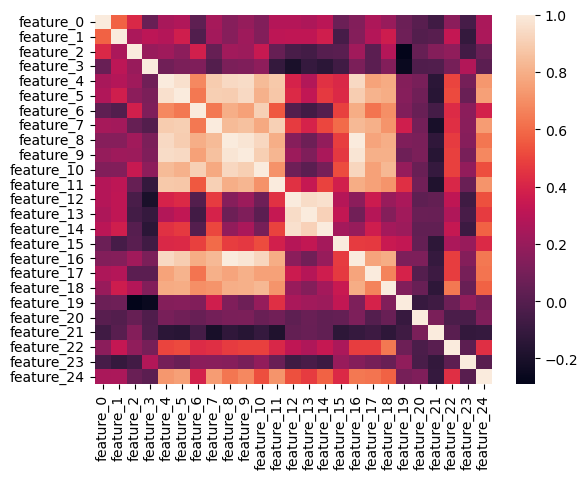

In [31]:
corr = psm_test.corr()
sns.heatmap(corr)

In [32]:
# moderate-high correlation between the variables 

In [33]:
anomalies4 = psm_test[psm_test_label['label'] == 1]
anomalies4.shape

(24381, 25)

In [34]:
percentage = (anomalies4.shape[0] / test.shape[0]) * 100
print(f"{percentage:.4f}% of the rows are anomaly in smap dataset")

34.8295% of the rows are anomaly in smap dataset


In [35]:
# High percentage of anomaly

In [36]:
psm_test_label.head()

,label
timestamp_(min),
132480.0,0
132481.0,0
132482.0,0
132483.0,0
132484.0,0


In [37]:
# Correlation 
correlations4 = []

for column_name in psm_test.columns:
    corr = psm_test[column_name].corr(psm_test_label['label'])
    if not np.isnan(corr):  
        correlations4.append(corr)


correlations4 = np.array(correlations4)

print(correlations4)


[ 0.01441705  0.1509992   0.04562435  0.14254063 -0.02308994 -0.02472862
  0.15758801 -0.00127756  0.01737823 -0.02325849  0.14485696 -0.0343118
  0.04745435  0.12808091  0.04018683  0.18639167  0.02335523  0.08655028
  0.20068129  0.09298762 -0.04429663  0.13247746  0.24968015  0.11436747
  0.05791311]


In [38]:
# many columns have positive correlation with anomaly 

# D) Variables which are the root cause of anomaly

## Root Cause For Test Dataset (test.csv -> test_label.csv)

In [39]:
# The columns with highest correlation with anomaly
root_cause1 = []
for i in range(len(correlations1)): # correlations1 is the array of correlations between variables of dataframe with label(anomaly)
    if not np.isnan(correlations1[i]):  # to exclude variables that have NaN correlation
        root_cause1.append((str(i), correlations1[i]))

root_cause1.sort(key=lambda x: x[1], reverse=True)

for i in range(min(5, len(root_cause1))):  
    print(f"Variable {root_cause1[i][0]} with correlation: {root_cause1[i][1]}")


Variable 1 with correlation: 0.31834041985774447
Variable 2 with correlation: 0.31698594117470863
Variable 3 with correlation: 0.31473915180434314
Variable 14 with correlation: 0.23051732079171097
Variable 5 with correlation: 0.20013164967883842


In [40]:
# the above columns have the highest contribution towards anomaly

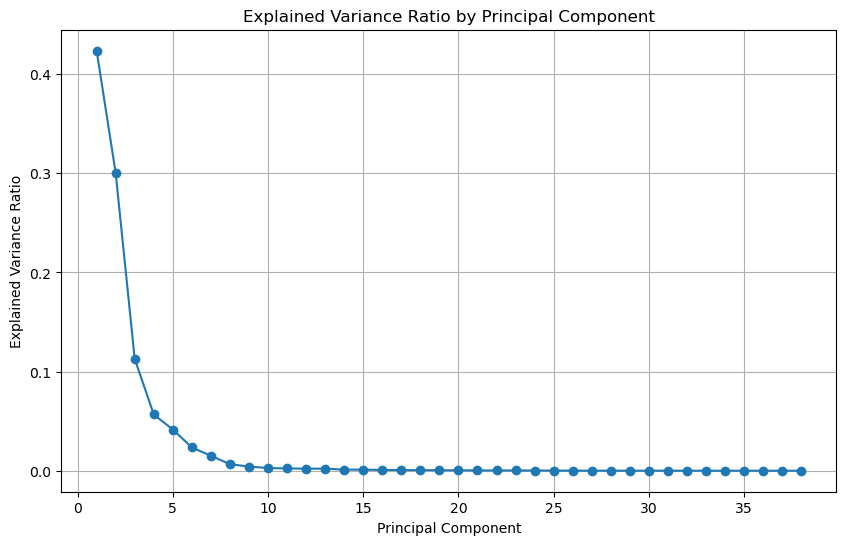

In [41]:
# Using PCA to find the columns with highest explained_variance_ratio
pca = PCA()
pca.fit(test)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [42]:
# Clearly from PCA also variable 0, 1, 2 have high explained_variance_ratio and variable 1, 2, 3 had high correlation with anomaly

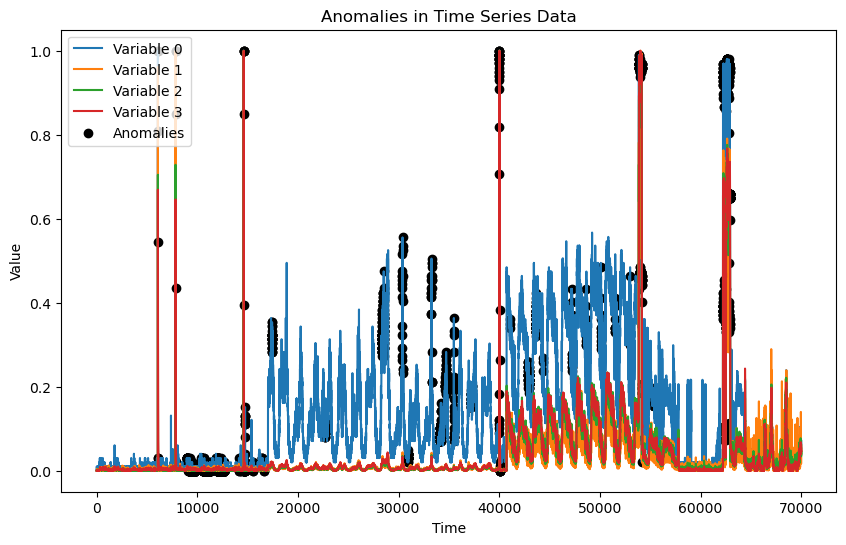

In [43]:
# Let's Plot variable 0, 1, 2 and 3 to see if they are the root cause of anomaly
anomaly_indices = test_label[test_label.iloc[:, 0] == 1].index
plt.figure(figsize=(10, 6))


plt.plot(test.index, test.iloc[:, 0], label='Variable 0')
plt.plot(test.index, test.iloc[:, 1], label='Variable 1')
plt.plot(test.index, test.iloc[:, 2], label='Variable 2')
plt.plot(test.index, test.iloc[:, 3], label='Variable 3')


plt.scatter(anomaly_indices, test.iloc[anomaly_indices, 0], color='black', label='Anomalies')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomalies in Time Series Data')
plt.legend()
plt.show()



#### These 4 variables 0, 1, 2, and 3 are the root cause of anomaly in Test dataset.

## Root Cause For Smap Dataset (smap_test.csv -> smap_test_label.csv)

In [44]:
# The columns with highest correlation with anomaly
root_cause2 = []
for i in range(len(correlations2)): # correlations1 is the array of correlations between variables of dataframe with label(anomaly)
    if not np.isnan(correlations2[i]):  # to exclude variables that have NaN correlation
        root_cause2.append((str(i), correlations2[i]))

root_cause2.sort(key=lambda x: x[1], reverse=True)

for i in range(min(5, len(root_cause2))):  
    print(f"Variable {root_cause2[i][0]} with correlation: {root_cause2[i][1]}")


Variable 0 with correlation: 0.042817365417020185
Variable 23 with correlation: 0.02112984884086954
Variable 24 with correlation: 0.02112984884086954
Variable 15 with correlation: 0.020749075394912702
Variable 16 with correlation: 0.020749075394912702


In [45]:
# Very low correlation of variables with anomaly but variable 0 still has the highest correlation

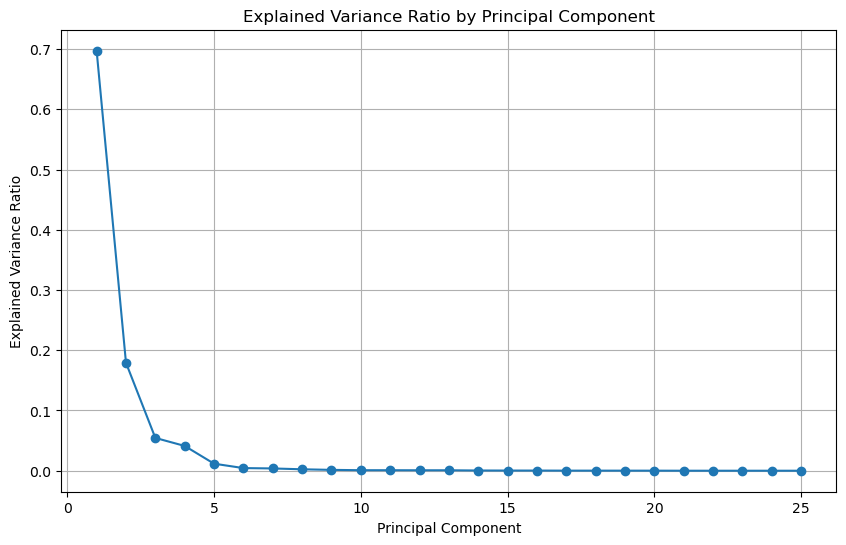

In [46]:

pca = PCA()
pca.fit(smap_test)


explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [47]:
# varible 0 has highest explained_variance ratio and highest correlation with anomaly

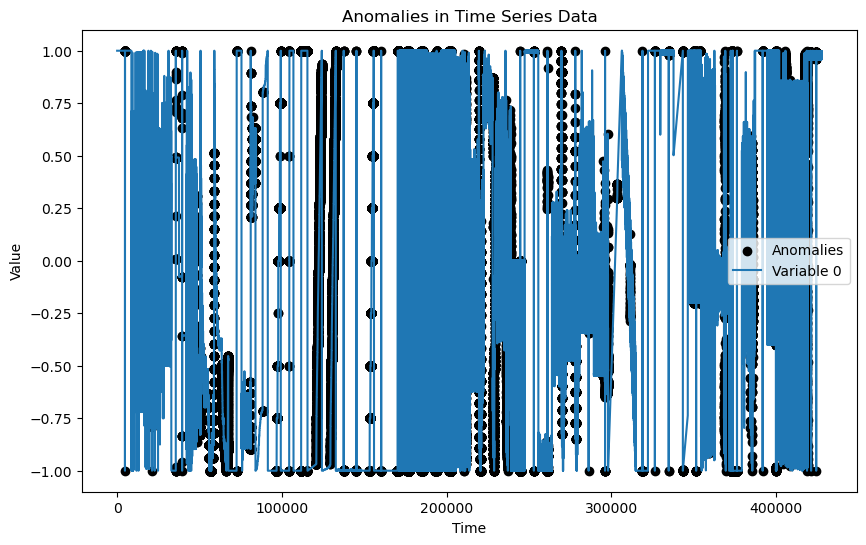

In [48]:
# Let's plot Variable 0 against anomaly and verify if it's the root cause anomaly or not
anomaly_indices = smap_test_label[smap_test_label.iloc[:, 0] == 1].index

plt.figure(figsize=(10, 6))
plt.scatter(anomaly_indices, smap_test.iloc[anomaly_indices, 0], color='black', label='Anomalies')
plt.plot(smap_test.index, smap_test.iloc[:,0], label='Variable 0')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomalies in Time Series Data')
plt.legend()
plt.show()


#### Variable 0 is clearly the root cause of the anomaly

## Root Cause For Msl Dataset (msl_test.csv -> msl_test_label.csv)

In [49]:
# The columns with highest correlation with anomaly
root_cause3 = []
for i in range(len(correlations3)): 
    if not np.isnan(correlations3[i]):  
        root_cause3.append((str(i), correlations3[i]))

root_cause3.sort(key=lambda x: x[1], reverse=True)

for i in range(min(5, len(root_cause3))):  
    print(f"Variable {root_cause3[i][0]} with correlation: {root_cause3[i][1]}")


Variable 0 with correlation: 0.1432760743675312
Variable 20 with correlation: 0.04007327698416761
Variable 9 with correlation: 0.02809434486237187
Variable 22 with correlation: 0.024748463246036516
Variable 1 with correlation: 0.02163566426614554


In [50]:
# variable 0 has the highest correlation with anomaly

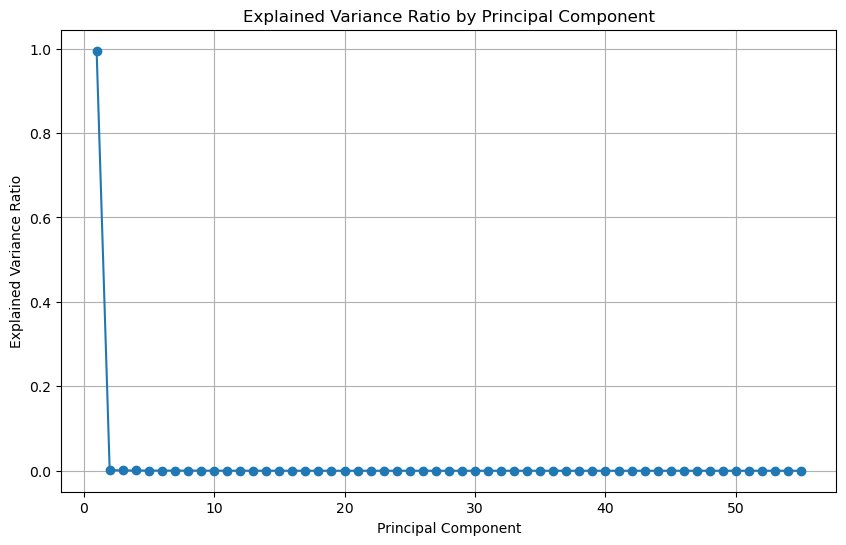

In [51]:

pca = PCA()
pca.fit(msl_test)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [52]:
# Variable 0 has highest explained_variance_ratio

In [53]:
# Lets plot variable 0 against anomaly to see if it is the root cause of anomaly

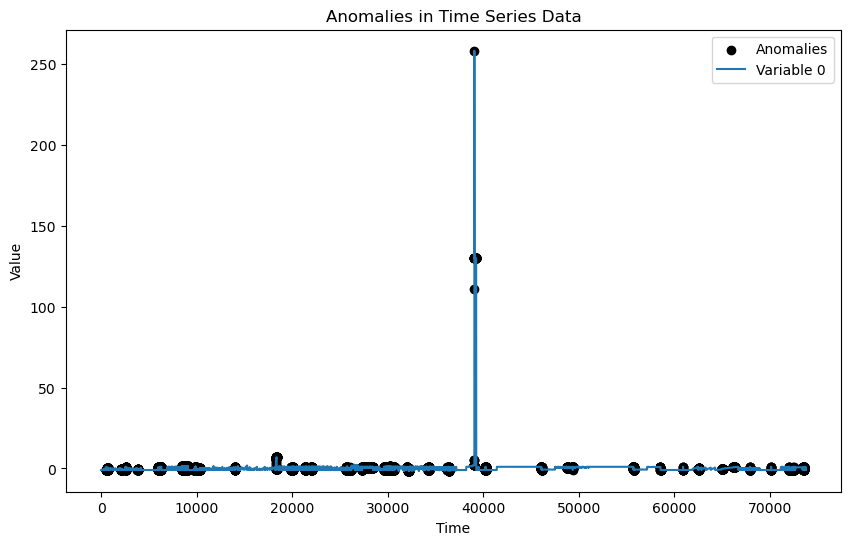

In [54]:
anomaly_indices = msl_test_label[msl_test_label.iloc[:, 0] == 1].index

plt.figure(figsize=(10, 6))
plt.scatter(anomaly_indices, msl_test.iloc[anomaly_indices, 0], color='black', label='Anomalies')
plt.plot(msl_test.index, msl_test.iloc[:,0], label='Variable 0')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomalies in Time Series Data')
plt.legend()
plt.show()



#### Clearly variable 0 is the root cause of anomaly in Msl dataset

## Root Cause For Psm Dataset (psm_test.csv -> psm_test_label.csv)

In [55]:
# The columns with highest correlation with anomaly
root_cause4 = []
for i in range(len(correlations4)): 
    if not np.isnan(correlations4[i]): 
        root_cause4.append((str(i), correlations4[i]))

root_cause4.sort(key=lambda x: x[1], reverse=True)

for i in range(min(5, len(root_cause4))):  
    print(f"Variable {root_cause4[i][0]} with correlation: {root_cause4[i][1]}")


Variable 22 with correlation: 0.24968015430470564
Variable 18 with correlation: 0.2006812931079111
Variable 15 with correlation: 0.1863916721311671
Variable 6 with correlation: 0.15758801005201784
Variable 1 with correlation: 0.15099920150994814


In [56]:
# A lot of variables have considerably high correlation with anomaly, so we can't choose on the basis of correlation

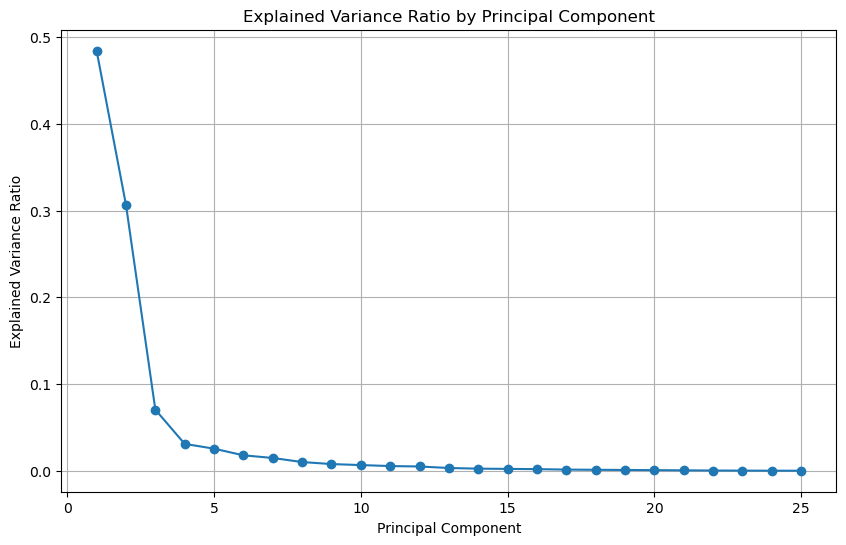

In [57]:

pca = PCA()
pca.fit(psm_test)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [58]:
# Variable 0 has highest explained variance ratio

In [59]:
psm_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
timestamp_(min),,,,,,,,,,,,,,,,,,,,,
132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,0.478078,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,0.494367,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,0.484878,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,0.488316,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,0.487094,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599


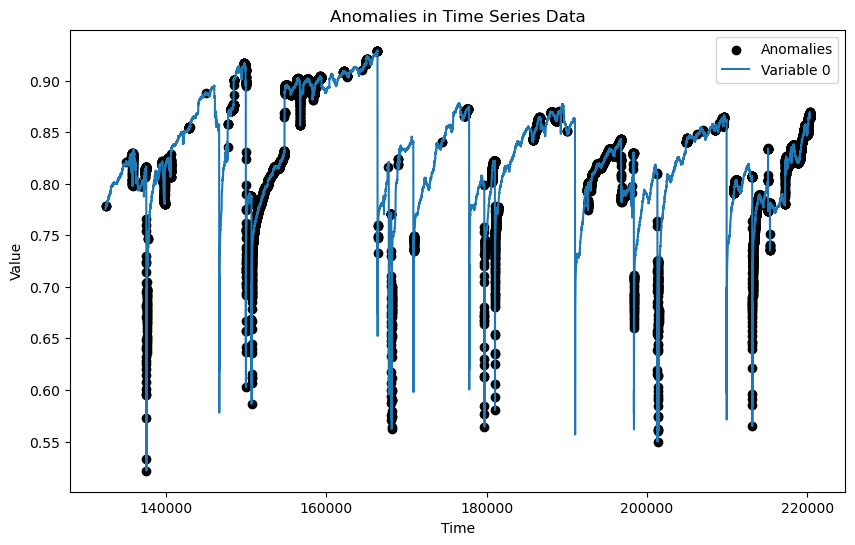

In [60]:
# Plotting Variable 0 to see if it is the root cause of anomaly
anomaly_indices = psm_test_label[psm_test_label['label'] == 1].index

plt.figure(figsize=(10, 6))


plt.scatter(anomaly_indices, psm_test.loc[anomaly_indices, 'feature_0'], color='black', label='Anomalies')

# Line plot for Variable 0 ('feature_0')
plt.plot(psm_test.index, psm_test['feature_0'], label='Variable 0')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomalies in Time Series Data')
plt.legend()
plt.show()

#### It is clear variable 0 (feature_0) is the root cause of anomaly in Psm Dataset.